In [1]:
import pandas as pd
import numpy as np

Loading the data

In [2]:
f = open("p2p-Gnutella04.txt", "r")
text = f.read()
text_arr = text.split("\n")
start_entry = 5
end_entry = -1
a = text_arr[5]
a.split("\t")

def get_nodes(string):
    node_arr = string.split("\t")
    start_node = int(node_arr[0].strip())
    end_node = int(node_arr[1].strip())
    
    return [start_node, end_node]


node_arr = []
for string in text_arr[start_entry:end_entry]:
    node_arr.append(get_nodes(string))
    
node_arr



max_node_val = 0
for row in node_arr:
    max_node_val = max(max_node_val, row[0])
    max_node_val = max(max_node_val, row[1])
    
max_node_val += 1

Creating the Graph

In [87]:
class graph:
    def __init__(self, num_nodes):
        
        
        self.adjacency_list = []
        self.num_nodes = num_nodes
        self.num_edges = 0
        
        self.matrix = []
        for i in range(num_nodes):
            arr = []
            for j in range(num_nodes):
                arr.append(0)
            self.matrix.append(arr)
            self.adjacency_list.append([])
        
    def addEdge(self, start_node, end_node):
        if(self.matrix[start_node][end_node] != 1):
            self.num_edges += 1
        self.matrix[start_node][end_node] = 1
        self.adjacency_list[start_node].append(end_node)
        
    
    def getNodes(self):
        return self.num_nodes
    
    def getEdges(self):
        return self.num_edges
    
    def get_vertex_indegree(self, i):
        curr_node_in_degree = 0
        for j in range(self.num_nodes):
            curr_node_in_degree += self.matrix[i][j]
        return curr_node_in_degree
    
    def get_vertex_outdegree(self, i):
        curr_node_out_degree = 0
        for j in range(self.num_nodes):
            curr_node_out_degree += self.matrix[j][i]
        return curr_node_out_degree
    
    def calculate_average_indegree(self):
        in_degree = 0
        for i in range(self.num_nodes):
            curr_node = i
            curr_node_in_degree = self.get_vertex_indegree(i)            
            in_degree += curr_node_in_degree
        return in_degree/self.num_nodes
    
    def calculate_average_outdegree(self):
        out_degree = 0
        for i in range(self.num_nodes):
            curr_node = i
            curr_node_out_degree = self.get_vertex_outdegree(i)
            out_degree += curr_node_out_degree
        return out_degree/self.num_nodes

    
    def get_node_max_indegree(self):
        max_in_degree = 0
        node = 0
        for i in range(self.num_nodes):
            curr_node = i
            curr_node_in_degree = self.get_vertex_indegree(i)            
            if(curr_node_in_degree > max_in_degree):
                max_in_degree = curr_node_in_degree
                node = i
        return node
    
    def get_node_max_outdegree(self):
        max_out_degree = 0
        node = 0
        for i in range(self.num_nodes):
            curr_node = i
            curr_node_out_degree = self.get_vertex_outdegree(i)            
            if(curr_node_out_degree > max_out_degree):
                max_out_degree = curr_node_out_degree
                node = i
        return node
    
    def get_density(self):
        return self.num_edges/(self.num_nodes*(self.num_nodes-1))
    
    
    def get_indegrees(self):
        in_degree_arr = []
        for i in range(self.num_nodes):
            in_degree_arr.append(self.get_vertex_indegree(i))
        return in_degree_arr
    
    def get_outdegrees(self):
        out_degree_arr = []
        for i in range(self.num_nodes):
            out_degree_arr.append(self.get_vertex_outdegree(i))
        return out_degree_arr
    
    
    
    def get_cluster_coeff_node(self, node):
        neighbors = self.adjacency_list[node]
        if len(neighbors) < 2:
            return 0
        count = 0
        for neighbor_node in neighbors:
            neighbor_node_list = self.adjacency_list[neighbor_node]
            for neighbor_node_2 in neighbors:
                if neighbor_node_2 in neighbor_node_list:
                    count += 1
        n = len(neighbors)
        return count/(n*(n-1))
    
    def get_cluster_coeffs(self):
        clust_coeff_arr = []
        for i in range(self.num_nodes):
            clust_coeff_arr.append(self.get_cluster_coeff_node(i))
            
        return clust_coeff_arr
    
    
    def getDensity(self):
        n = self.num_nodes
        return self.num_edges/(n*(n-1))
    
    

Graph = graph(max_node_val)

    
for row in node_arr:
    try:
        Graph.addEdge(row[0], row[1])
    except:
        print(row)
        
    

        
        
    

1. Number of Nodes

In [19]:
graph.getNodes(Graph)

10878

2. Number of Edges

In [85]:
graph.getEdges(Graph)

39993

3. Average  In-degree

In [86]:
graph.calculate_average_indegree(Graph)

3.676165088703006

4. Average Out-degree

In [ ]:
graph.calculate_average_outdegree(Graph)

5. Node with Max In-degree

In [31]:
graph.get_node_max_indegree(Graph)

(3109, 1054)

6. Node with Max Out-degree

In [33]:
graph.get_node_max_outdegree(Graph)

3.676165088703006

7. The density of Network

In [88]:
graph.getDensity(Graph)

0.0003379449428849978

In [76]:
import matplotlib.pyplot as plt
in_degrees = graph.get_indegrees(Graph)
out_degrees = graph.get_outdegrees(Graph)
cluster_coeff_arr = graph.get_cluster_coeffs(Graph)

# In-Degree distribution of the network 

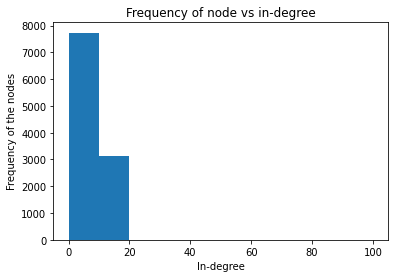

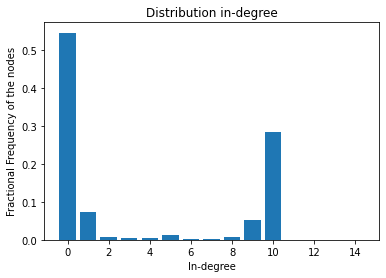

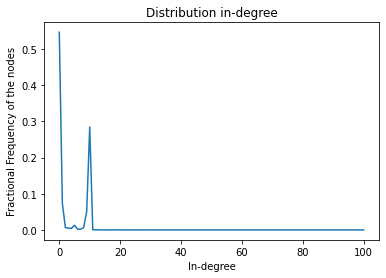

In [69]:
unique_degrees = [i for i in set(in_degrees)]
unique_degrees
frequency_count = []
total_count = 0
for degree in unique_degrees:
    count = 0
    for i in in_degrees:
        if i == degree:
            count += 1
    total_count += count 
    frequency_count.append(count)


frequency_count
fractional_frequency_count = []
for count in frequency_count:
#     fractional_frequency_count.append(count/graph.getNodes(Graph))
    fractional_frequency_count.append(count/total_count)
plt.hist(in_degrees)
plt.title("Frequency of node vs in-degree")
plt.xlabel("In-degree")
plt.ylabel("Frequency of the nodes")
plt.show()

x = []
y = []
for i in range(len(unique_degrees)):
    if unique_degrees[i] < 15:
        x.append(unique_degrees[i])
        y.append(fractional_frequency_count[i])

plt.title("Distribution in-degree")
plt.xlabel("In-degree")
plt.ylabel("Fractional Frequency of the nodes")

plt.bar(x,y)
plt.show()


plt.title("Distribution in-degree")
plt.xlabel("In-degree")
plt.ylabel("Fractional Frequency of the nodes")

plt.plot(unique_degrees, fractional_frequency_count)
plt.show()

# Out-Degree distribution of the network

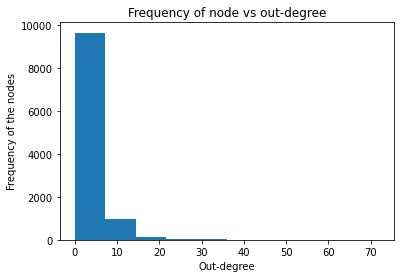

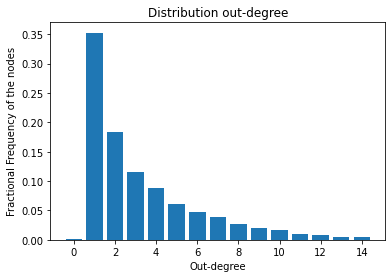

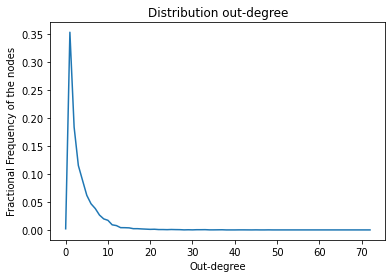

In [81]:
unique_degrees = [i for i in set(out_degrees)]
unique_degrees
frequency_count = []
total_count = 0
for degree in unique_degrees:
    count = 0
    for i in out_degrees:
        if i == degree:
            count += 1
    total_count += count
    frequency_count.append(count)


frequency_count
fractional_frequency_count = []
for count in frequency_count:
#     fractional_frequency_count.append(count/graph.getNodes(Graph))
    fractional_frequency_count.append(count/total_count)
plt.hist(out_degrees)
plt.title("Frequency of node vs out-degree")
plt.xlabel("Out-degree")
plt.ylabel("Frequency of the nodes")
plt.show()

x = []
y = []
for i in range(len(unique_degrees)):
    if unique_degrees[i] < 15:
        x.append(unique_degrees[i])
        y.append(fractional_frequency_count[i])

plt.title("Distribution out-degree")
plt.xlabel("Out-degree")
plt.ylabel("Fractional Frequency of the nodes")

plt.bar(x,y)
plt.show()


plt.title("Distribution out-degree")
plt.xlabel("Out-degree")
plt.ylabel("Fractional Frequency of the nodes")

plt.plot(unique_degrees, fractional_frequency_count)
plt.show()

# Local Clustering Coefficient Distribution

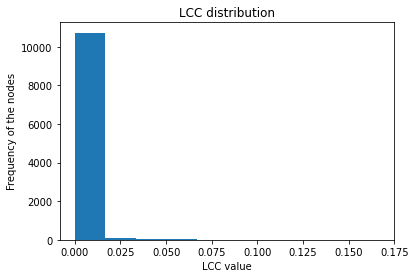

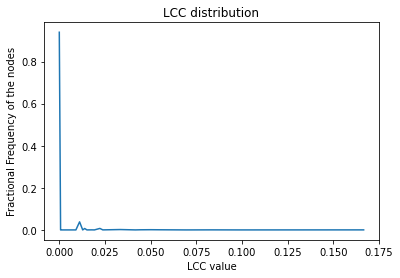

In [89]:

unique_degrees = [i for i in set(cluster_coeff_arr)]
unique_degrees.sort()
frequency_count = []
total_count = 0
for degree in unique_degrees:
    count = 0
    for i in cluster_coeff_arr:
        if i == degree:
            count += 1
    total_count += count
    frequency_count.append(count)

frequency_count
fractional_frequency_count = []
for count in frequency_count:
#     fractional_frequency_count.append(count/graph.getNodes(Graph))
    fractional_frequency_count.append(count/total_count)
plt.hist(cluster_coeff_arr)
plt.title("LCC distribution")
plt.xlabel("LCC value")
plt.ylabel("Frequency of the nodes")
plt.show()

plt.title("LCC distribution")
plt.xlabel("LCC value")
plt.ylabel("Fractional Frequency of the nodes")

plt.plot(unique_degrees, fractional_frequency_count)
plt.show()